### Libraries 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.chdir("C:\\Users\\Prakrutdesai.PRAKRUT\\Documents\\Jupyter Notebook\\Nirja\\Midterm")

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'AccutedataProject.ipynb',
 'accute_inflammation.csv',
 'mid_term_project.pdf']

### Data Manipulation 

In [6]:
data = pd.read_csv("accute_inflammation.csv")

In [8]:
data.columns = ['Temp','Nausea','Lumbar','Urine','Micturition','Burning','Inflammation','Nephritis']

In [9]:
data.head()

,Temp,Nausea,Lumbar,Urine,Micturition,Burning,Inflammation,Nephritis
0,35.3,no,yes,no,no,no,no,no
1,35.3,no,no,yes,yes,yes,yes,no
2,35.3,no,yes,no,no,no,no,no
3,36.3,no,no,yes,yes,yes,yes,no
4,36.3,no,yes,no,no,no,no,no


In [10]:
# converting Y/N to 1/0
yn_map = {
    'yes': 1,
    'no': 0
}

data.iloc[:,1:] = data.iloc[:,1:].apply(lambda x: x.map(yn_map))

In [24]:
def defTarget(datapoint):
    if (datapoint.Inflammation==0) & (datapoint.Nephritis==0):
        return 1
    elif (datapoint.Inflammation==0) & (datapoint.Nephritis==1):
        return 2
    elif (datapoint.Inflammation==1) & (datapoint.Nephritis==0):
        return 3
    elif (datapoint.Inflammation==1) & (datapoint.Nephritis==1):
        return 4
    else:
        return -1

In [31]:
data['target'] = data.apply(lambda x: defTarget(x), axis=1)

data.drop(columns=['Inflammation','Nephritis'], inplace=True)

In [32]:
data.target.value_counts()

3    40
2    31
1    30
4    19
Name: target, dtype: int64

In [33]:
data.head()

,Temp,Nausea,Lumbar,Urine,Micturition,Burning,target
0,35.3,0,1,0,0,0,1
1,35.3,0,0,1,1,1,3
2,35.3,0,1,0,0,0,1
3,36.3,0,0,1,1,1,3
4,36.3,0,1,0,0,0,1


### EDA 

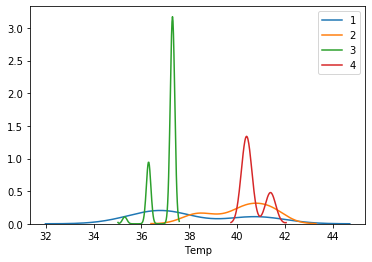

In [43]:
for i in sorted(data.target.unique()):
    temp = data.query("target=={}".format(i))
    sns.distplot(temp['Temp'], label = i, hist = False)
plt.legend()
plt.show()